# Diabetes Classifier Code

## KNN Model

/opt/tljh/user/lib/python3.9/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.22.2)
  from scipy.stats import gaussian_kde


K: 3, Training Recall: 0.9510
K: 4, Training Recall: 0.8179
K: 5, Training Recall: 0.8389
K: 6, Training Recall: 0.7110
K: 7, Training Recall: 0.7758
K: 8, Training Recall: 0.6988
K: 9, Training Recall: 0.7408
K: 10, Training Recall: 0.6953

Optimal k: 3 with training recall: 95.10%

Validation Results for KNN:
Validation set Accuracy: 87.61%
Validation set Precision: 81.88%
Validation set Recall: 82.17%
Validation set F1-score: 82.02%


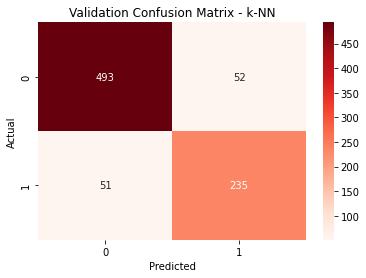

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load data
data = pd.read_csv("Healthcare-Diabetes.csv")
X = data.drop(columns=["Outcome", "Id", "Pregnancies", "BloodPressure"])
y = data["Outcome"]

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42, stratify=y_train)

# Find optimal k
best_k = 0
best_recall = 0

for k in range(3, 11):
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    
    recall = recall_score(y_train, y_train_pred)
    
    print(f"K: {k}, Training Recall: {recall:.4f}")
    
    if recall > best_recall:
        best_recall = recall
        best_k = k

print(f"\nOptimal k: {best_k} with training recall: {best_recall * 100:.2f}%")

# Train KNN 
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate Model
y_val_pred = best_knn.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, pos_label=1)
recall_val = recall_score(y_val, y_val_pred, pos_label=1)
f1_val = f1_score(y_val, y_val_pred)

print("\nValidation Results for KNN:")
print(f"Validation set Accuracy: {accuracy_val * 100:.2f}%")
print(f"Validation set Precision: {precision_val * 100:.2f}%")
print(f"Validation set Recall: {recall_val * 100:.2f}%")
print(f"Validation set F1-score: {f1_val * 100:.2f}%")


# Confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.title("Validation Confusion Matrix - k-NN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## GaussianNB Model


Validation Results for GaussianNB:
Validation set Accuracy: 75.45%
Validation set Precision: 69.16%
Validation set Recall: 51.75%
Validation set F1-score: 59.20%


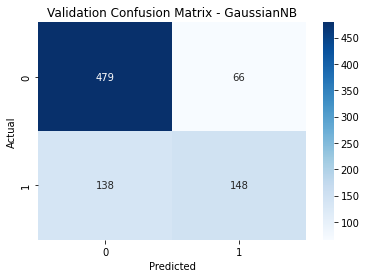

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Load data
data = pd.read_csv("Healthcare-Diabetes.csv")
X = data.drop(columns=["Outcome", "Id", "Pregnancies", "BloodPressure"])
y = data["Outcome"]

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42, stratify=y_train)

# Train GaussianNB 
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate Model
y_val_pred = gnb.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, pos_label=1)
recall_val = recall_score(y_val, y_val_pred, pos_label=1)
f1_val = f1_score(y_val, y_val_pred)


print("\nValidation Results for GaussianNB:")
print(f"Validation set Accuracy: {accuracy_val * 100:.2f}%")
print(f"Validation set Precision: {precision_val * 100:.2f}%")
print(f"Validation set Recall: {recall_val * 100:.2f}%")
print(f"Validation set F1-score: {f1_val * 100:.2f}%")


# Confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Validation Confusion Matrix - GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree Model


Validation Results for DecisionTree:
Validation set Accuracy: 90.37%
Validation set Precision: 87.05%
Validation set Recall: 84.62%
Validation set F1-score: 85.82%

Test Results for DecisionTree:
Test set Accuracy: 94.22%
Test set Precision: 92.47%
Test set Recall: 90.53%
Test set F1-score: 91.49%


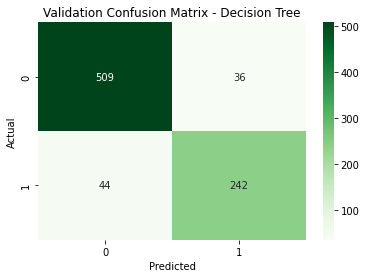

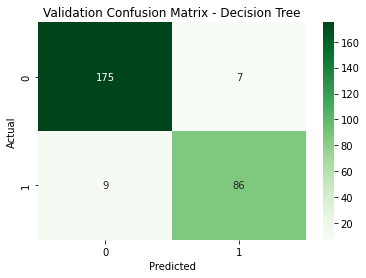

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Load data
data = pd.read_csv("Healthcare-Diabetes.csv")
X = data.drop(columns=["Outcome", "Id", "Pregnancies", "BloodPressure"])
y = data["Outcome"]

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42, stratify=y_train)

# Train DecisionTreeClassifier 
dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
dt.fit(X_train, y_train)

# Evaluate Model
y_val_pred = dt.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, pos_label=1)
recall_val = recall_score(y_val, y_val_pred, pos_label=1)
f1_val = f1_score(y_val, y_val_pred)


print("\nValidation Results for DecisionTree:")
print(f"Validation set Accuracy: {accuracy_val * 100:.2f}%")
print(f"Validation set Precision: {precision_val * 100:.2f}%")
print(f"Validation set Recall: {recall_val * 100:.2f}%")
print(f"Validation set F1-score: {f1_val * 100:.2f}%")


# Test model
y_test_pred = dt.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, pos_label=1)
recall_test = recall_score(y_test, y_test_pred, pos_label=1)
f1_test = f1_score(y_test, y_test_pred)


print("\nTest Results for DecisionTree:")
print(f"Test set Accuracy: {accuracy_test * 100:.2f}%")
print(f"Test set Precision: {precision_test * 100:.2f}%")
print(f"Test set Recall: {recall_test * 100:.2f}%")
print(f"Test set F1-score: {f1_test * 100:.2f}%")


# Validation Confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Greens", cbar=True)
plt.title("Validation Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", cbar=True)
plt.title("Validation Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC Curve

Model: Decision Tree, AUC: 0.95
Model: KNN, AUC: 0.86
Model: GNB, AUC: 0.81


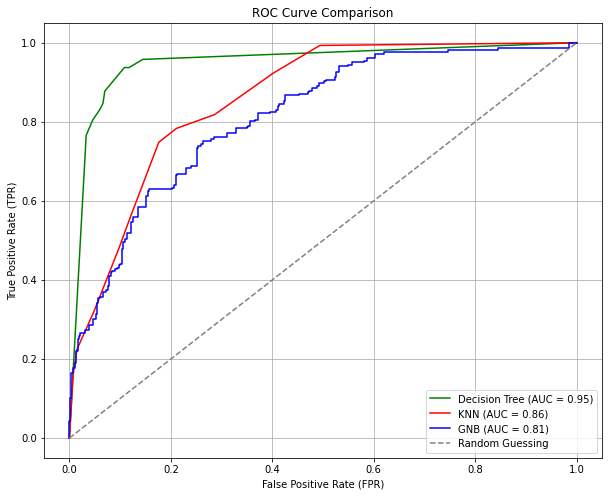

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

models = {"Decision Tree": dt, "KNN": knn, "GNB": gnb}
colors = {"Decision Tree": "green", "KNN": "red", "GNB": "blue"}

plt.figure(figsize=(10, 8))
for modelName, model in models.items():
    y_val_proba = model.predict_proba(X_val)[:, 1]

    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    auc = roc_auc_score(y_val, y_val_proba)
    print(f"Model: {modelName}, AUC: {auc:.2f}")
    plt.plot(fpr, tpr, color=colors[modelName], label=f"{modelName} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guessing")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()